In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import itertools
import json

In [2]:
data = pd.read_csv("youtube-comments.csv",error_bad_lines=False,usecols =["Comment"])
data.head()

C:\Users\Sabarish\AppData\Local\Temp\ipykernel_5108\2623070153.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("youtube-comments.csv",error_bad_lines=False,usecols =["Comment"])


,Comment
0,Sir i order 2 charging model and i payment it ...
1,How can I contact u ?
2,"Hello,\nYou can contact us at care@robocraze.com"
3,robocraze web site per koi 1000pcs 5mm led nhi...
4,Your web site real or fake please tell your se...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30268 entries, 0 to 30267
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  30267 non-null  object
dtypes: object(1)
memory usage: 236.6+ KB


In [4]:
data[data['Comment'].duplicated(keep=False)].sort_values('Comment').head(8)

,Comment
22879,#boycott_qatar_fifa_2022
22880,#boycott_qatar_fifa_2022
6463,*_Sexy07.com_* 🍊
3092,*_Sexy07.com_* 🍊
6204,*_Sexy07.com_* 🍌
3130,*_Sexy07.com_* 🍌
29720,*🎯 أرقام ميسي مع باريس في جميع المسابقات الرسم...
29977,*🎯 أرقام ميسي مع باريس في جميع المسابقات الرسم...


In [5]:
data = data.drop_duplicates('Comment')

In [6]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['Comment'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc.astype('U'))

In [7]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[100:300])

24405
['11min', '11s', '11th', '11v11', '12', '120', '1200', '120lb', '120m', '120s', '122', '123', '1234456789', '1234567890wygsjhxjshxdhueopkpkbijojokjojjkjjjjx', '124', '125m', '1261', '128', '12h', '12s', '12th', '12times', '12v', '12vs', '13', '130', '131', '133nj1', '13563', '136', '137', '14', '140', '140pro', '1410', '1426483409', '146', '147', '14anni', '14s', '15', '150', '150s', '151', '1510937071', '1510937610', '151s', '157748885', '1579749', '15kg', '15reps', '15s', '15sec', '15th', '15years', '15½', '16', '16s', '16th', '16x110', '17', '170cm', '172', '175982', '179', '17t22_09_49_139z', '17th', '18', '180', '1800s', '183', '185', '185lbs', '186cm', '18773', '18863', '1894', '18kg', '18s', '18th', '19', '19000th', '1904', '1907', '192', '1932s', '194', '1942', '1945', '1950', '1950s', '1958', '1960', '1961', '196s', '1970', '1978', '1981', '1985', '1987', '1995', '1997', '19tg', '1_zdulj5z9w', '1a38yf6uqva', '1a6y_ajjfli', '1aj3n3v4zh8', '1caxhebcshw', '1day', '1dolar', 

C:\Users\Sabarish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [9]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc.astype('U'))
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\Sabarish\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


17658
["''", "'c", "'d", "'empuja", "'gg'", "'i", "'penaldo'", "'ronaldo", "'s", "'skill'", "'unselfish", "a'm", 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaai', 'aaaaaall', 'aaaahooo', 'aaaand', 'aaah', 'aachchha', 'aad', 'aada', 'aadami', 'aadhh', 'aaditi', 'aaega', 'aag', 'aah', 'aahahahhahahahahaahhahahah', 'aai', 'aaj', 'aakmist', 'aalag', 'aamiin', 'aaminnn', 'aamir', 'aamircr', 'aan', 'aani', 'aano', 'aap', 'aapan', 'aapka', 'aapn', 'aaps']


In [10]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc.astype('U'))
words = vectorizer3.get_feature_names()

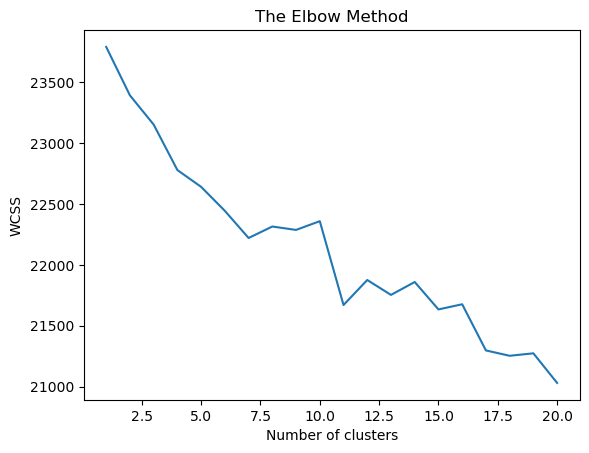

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 7, n_init = 20) 
kmeans.fit(X3)
# We look at the 7 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


0 : ronaldo, cristiano, best, messi, love, goal, goat, player, fan, king, freekick, score, miss, better, dybala, world, c, footbal, time, onli, amaz, viva, neymar, juventus, skill
1 : kick, free, score, ronaldo, bicycl, goal, final, cr, best, juventus, juve, cristiano, year, time, messi, s, just, like, ball, goat, amaz, nice, video, want, long
2 : legend, cr, ronaldo, footbal, real, madrid, ramo, player, u, cristiano, true, best, miss, die, goat, goal, live, just, onli, king, buffon, histori, liga, club, like
3 : defend, ramo, sergio, best, video, make, world, van, good, pleas, watch, attack, dijk, i'm, thank, madrid, player, beat, know, better, maldini, ball, learn, help, v
4 : cr, best, goat, king, love, fan, goal, miss, world, player, op, o, messi, juventus, ronaldo, dybala, footbal, time, big, onli, amaz, freekick, forev, el, que
5 : like, look, ronaldo, video, run, messi, play, just, goal, fan, comment, score, footbal, make, player, cr, good, u, bro, defend, guy, game, s, whi, sou

In [18]:
# print("Prediction")

Y = vectorizer3.transform(data["Comment"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6,c7=[],[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comment"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)
    elif i == 6:
        c7.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c7[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "Ronaldo 😍😍😍😍😍🔥🔥",
  "Ronaldo my hero\nThe legend the king of football\nI love ronaldo ❤❤❤\n🏅🏅🏅💞💞💞",
  "Ronaldo is the best",
  "Well Done Ronaldo",
  "*Cristiano Ronaldo Best Gols • In The End - Linkin Park - Skills & Goals*\n*https://youtu.be/SrmF_8QTnoE*",
  "10 of Serie A's official channel's 11 most popular videos contain Ronaldo's name in the title.",
  "Cristiano ronaldo 💥https://youtu.be/0aPpmtt1Cmw",
  "Cristiano Ronaldo 🇵🇹🇵🇹🇵🇹🇵🇹🇵🇹",
  "Ronaldo",
  "_Opponent: Ronaldo you are 35\n_Ronaldo: watch this video\n_Golden boot: you are mine"
] 


[
  "CR7 the king of free kick",
  "With this curling technique he will surely score more goals from free kick spot",
  "What a  free kick goal from ronaldo",
  "I like  Ronaldo  free kick",
  "Nice free kick goal",
  "What a free kick from Ronaldo",
  "My favorite cr7 scored free amazing kick that's why video Series A trending again in india and salute for those dybala and others goal they were amazing to🤩",
  "This is the 16th consecut

6    22411
0     1703
5     1033
4      990
3      831
1      635
2      230
Name: prediction, dtype: int64

In [19]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c6:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c7:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)
# print(json.dumps(questions, indent = 2, ensure_ascii = False))

[204, 189, 40, 228, 51, 297, 4266]


In [20]:
kmeans = KMeans(n_clusters = 8, n_init = 20)
kmeans.fit(X3)
# We look at the 8 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : best, world, player, ronaldo, cr, defend, footbal, ramo, goal, messi, time, histori, cristiano, video, love, dybala, sergio, alway, thank, channel, gea, say, forev, play, like
1 : kick, free, score, ronaldo, bicycl, goal, final, cr, juventus, juve, cristiano, best, year, like, time, messi, s, just, ball, goat, amaz, nice, video, long, vs
2 : messi, goal, like, video, thank, just, play, love, s, defend, bro, footbal, u, good, run, ball, make, pleas, watch, t, player, score, ramo, man, lol
3 : distanc, time, like, run, goal, messi, long, m, cover, player, bruh, just, i'm, shot, length, look, score, thank, power, add, day, u, s, slow, set
4 : fan, big, cr, ronaldo, messi, like, pessi, madrid, vardrid, honest, barca, i'm, real, cristiano, footbal, dybala, biggest, boy, love, just, im, u, juve, say, iam
5 : cr, goat, king, love, goal, miss, legend, op, o, like, ronaldo, dybala, juventus, messi, footbal, onli, amaz, freekick, que, skill, real, t, nice, trend, greatest
6 : youtu, https, w

In [21]:
# print("Prediction")

Y = vectorizer3.transform(data["Comment"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6,c7,c8=[],[],[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comment"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)
    elif i == 6:
        c7.append(j)
    elif i == 7:
        c8.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c7[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c8[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "Ronaldo is the best",
  "CR7 BEST OF PLAYER ALL TIME IN THE WORLD",
  "RONALDO THE BEST",
  "Ronaldo is the best player",
  "2:45 Beautiful Goal\nCristiano Ronaldo is The Best.\nMantuuuuuLL..!!!",
  "NEVER SURENDER\nFINO ALA FINE\nONLY ONE CLUB IN THE WORLD\nALL THE BEST TO THE BOYS",
  "Is the best",
  "CR7 is a diamond 💎 .He gets his best form under pressure and no one can break him .",
  "ronaldo still the best👌",
  "cr7 the best of world"
] 


[
  "CR7 the king of free kick",
  "With this curling technique he will surely score more goals from free kick spot",
  "What a  free kick goal from ronaldo",
  "I like  Ronaldo  free kick",
  "Freekick is like penalty kick for Cristiano",
  "Nice free kick goal",
  "What a free kick from Ronaldo",
  "My favorite cr7 scored free amazing kick that's why video Series A trending again in india and salute for those dybala and others goal they were amazing to🤩",
  "This is the 16th consecutive year(2005-2020)  that Cristiano Ronaldo has score

2    23003
7     1548
5      874
0      848
1      625
6      471
4      433
3       31
Name: prediction, dtype: int64

In [22]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c6:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c7:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c8:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)

[91, 182, 4675, 13, 74, 45, 10, 185]


In [24]:
kmeans = KMeans(n_clusters = 11, n_init = 20) 
kmeans.fit(X3)
# We look at the 11 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : video, make, pleas, thank, watch, like, help, nice, skill, great, love, good, plz, veri, attack, defend, bro, u, channel, guy, footbal, realli, pls, ronaldo, whi
1 : ronaldo, cristiano, love, goal, goat, king, fan, like, miss, dybala, freekick, score, viva, amaz, legend, c, onli, better, time, juventus, op, laliga, footbal, effect, madrid
2 : youtu, https, w, k, q, ronaldo, g, f, c, l, e, s, m, video, v, z, t, y, o, j, n, h, best, p, x
3 : best, player, cr, world, footbal, goal, time, messi, histori, ramo, dybala, video, channel, love, thank, gea, laliga, play, skill, attack, liga, coach, bro, cristiano, alway
4 : kick, free, bicycl, score, ronaldo, goal, cr, best, cristiano, juve, year, juventus, time, like, just, s, ball, messi, goat, amaz, nice, vs, want, onli, t
5 : defend, best, ramo, video, world, watch, i'm, like, attack, good, sergio, beat, want, van, v, know, thank, help, ball, dijk, player, make, play, striker, skill
6 : cr, goat, king, fan, love, goal, miss, legend, op, 

In [25]:
# print("Prediction")

Y = vectorizer3.transform(data["Comment"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11=[],[],[],[],[],[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comment"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)
    elif i == 6:
        c7.append(j)
    elif i == 3:
        c8.append(j)
    elif i == 4:
        c9.append(j)
    elif i == 5:
        c10.append(j)
    elif i == 6:
        c11.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c7[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c8[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c9[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c10[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c11[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "Please share your 3rd video ie how to model deployment this is very important because I'm going to do a offline procect please",
  "this video is amazing sir  i am going to do a project that related to same project like disease detection using sound, can u guide me for this project it will helpful for me really reply me",
  "@Robocraze  sir actually i  am looking for a arduino nano 33 ble sense for this project  which is out of stock in robocraze sites so can i do this project without it ?? please refer some related video and some suggestion....",
  "Thanks! \nYou can check out our playlist on TinyML series for more similar videos\nhttps://www.youtube.com/watch?v=LXgL850p7b0&list=PLUwmiNOPP-7hrRFsplajItGAn5ykUjOgY",
  "bro can you make a video on esp32 with edge impulse to detect ecg monitoring please",
  "Thanks a lot. Stay tuned for duture videos",
  "Another amazing video 🙌😎",
  "Nice video",
  "Thank you!  Do check out our other videos in this playlist :)",
  "Thanks a lot Bos

7     21180
1      1343
9      1087
6       897
0       878
4       569
3       567
5       530
2       469
8       163
10      150
Name: prediction, dtype: int64

In [26]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c6:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c7:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c8:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c9:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c10:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c11:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)

[266, 134, 9, 58, 180, 181, 43, 0, 0, 0, 0]
